In [2]:
pip install opencv-rolling-ball

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for opencv-rolling-ball: filename=opencv_rolling_ball-1.0.1-py3-none-any.whl size=6877 sha256=07d5c8dce3c7e1aa969a98677935cac75cbcd836fbe94888a4725f659ff152e7
  Stored in directory: /root/.cache/pip/wheels/3a/70/a8/7370e02c4a5873655c000ebecabbf3a4e36628cfe925ddedf0
Successfully built opencv-rolling-ball


Enter image no. : 3
943 680 3


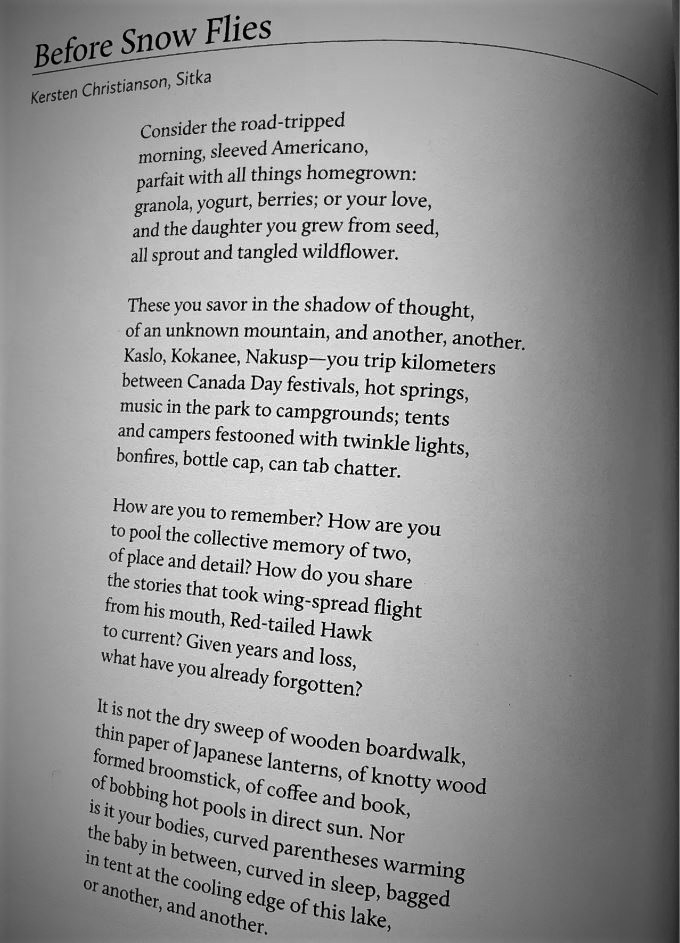

In [3]:
from PIL import Image
import cv2
import numpy
import matplotlib.pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow
import sys
from cv2_rolling_ball import subtract_background_rolling_ball

w=0
h=0
k=0

y=input("Enter image no. : ")
x=int(y)
#print(x)


img = cv2.imread("/content/gutters1.JPG")

if x==1:
  img = cv2.imread("/content/gutters1.JPG")

elif x==2:
  img = cv2.imread("/content/gutters2.JPG")

elif x==3:
  img = cv2.imread("/content/gutters3.JPG")


img_1=numpy.asarray(img)
#img_11.show()
w,h,k=numpy.shape(img_1)
print(w,h,k)
cv2_imshow(img_1)

l, a, b = cv2.split(img_1)


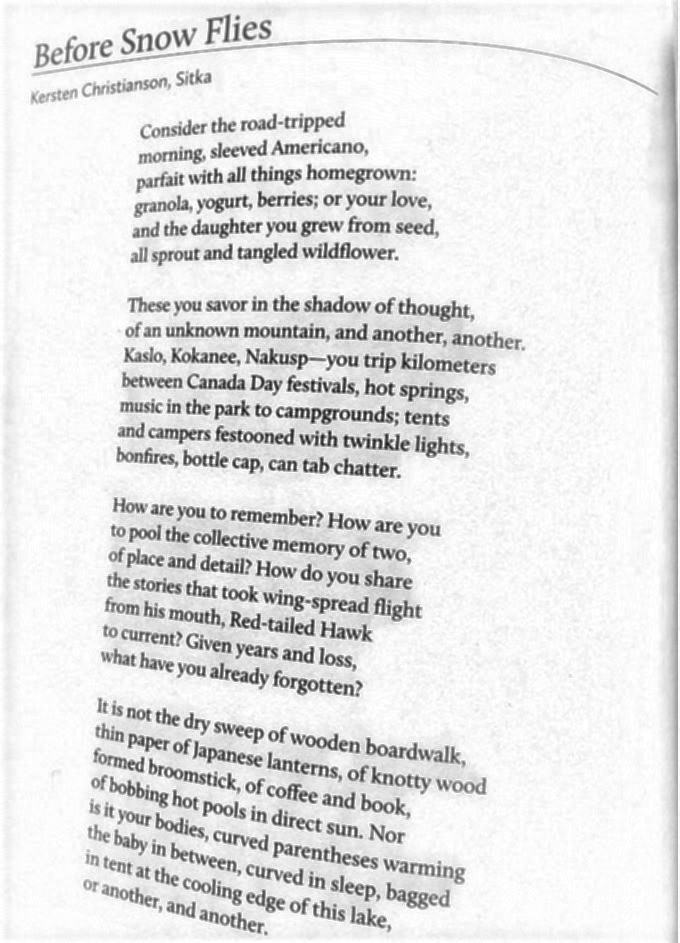

In [4]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
radius=20


final_img, background = subtract_background_rolling_ball(gray, radius, light_background=True,
                                     use_paraboloid=False, do_presmooth=True)

clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(8,8))
clahe_img = clahe.apply(final_img)

cv2_imshow(clahe_img)


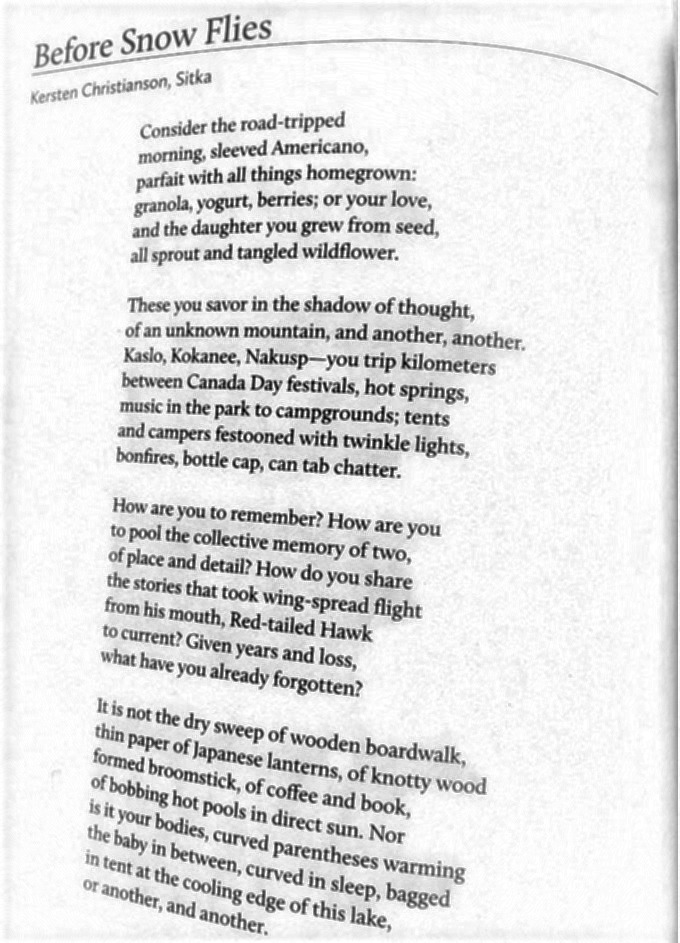

In [5]:
clahe_img_111=clahe_img.copy()

max2=clahe_img_111[0][0]
min2=clahe_img_111[0][0]

for i in range(w):
  for j in range(h):
    if max2<clahe_img_111[i][j]:
      max2=clahe_img_111[i][j]
    if min2>clahe_img_111[i][j]:
      min2=clahe_img_111[i][j]

for i in range(w):
  for j in range(h):
    clahe_img_111[i][j]=round(((clahe_img_111[i][j]-min2)*(255-0))/(max2-min2))

cv2_imshow(clahe_img_111)

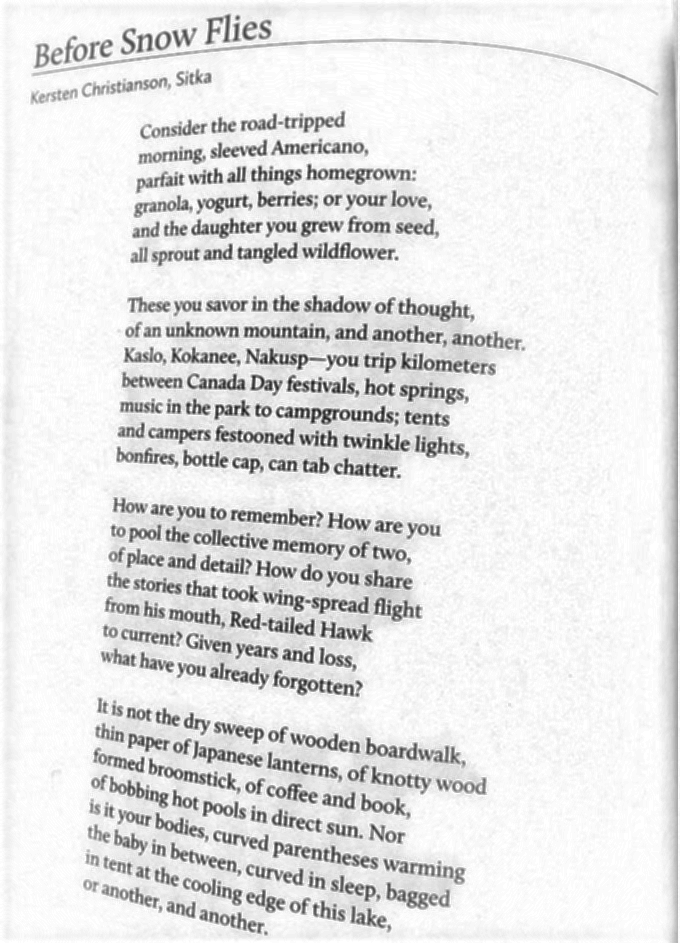

In [6]:
(B, G, R) = cv2.split(img_1)

radius=20

final_img_B, background_B = subtract_background_rolling_ball(B, radius, light_background=True,
                                     use_paraboloid=False, do_presmooth=True)

clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(8,8))
clahe_img_B = clahe.apply(final_img)

final_img_G, background = subtract_background_rolling_ball(G, radius, light_background=True,
                                     use_paraboloid=False, do_presmooth=True)

clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(8,8))
clahe_img_G = clahe.apply(final_img_G)

final_img_R, background = subtract_background_rolling_ball(R, radius, light_background=True,
                                     use_paraboloid=False, do_presmooth=True)

clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(8,8))
clahe_img_R = clahe.apply(final_img_R)

merged = cv2.merge([clahe_img_B, clahe_img_G, clahe_img_R])

cv2_imshow(merged)
